# Section 3: predicting the ground state energy of molecules

In chapter 1 we learned that Tensorflow does all its computations in its graph, that you first have to define. In chapter 2 we made or first neural network, and made a very simple classifier for the iris dataset. 

This chapter we are going to make our neural network more interesting. We are going to [predict the ground state energies of molecules](https://www.kaggle.com/haimfeld87/prediction-of-ground-state-energies-of-molecules). 

http://web.stanford.edu/class/cs20si/lectures/notes_09.pdf

## Video 1: downloading the data, visualising it 
Welcome to section 3 of our course. In this section we are going to predict the [ground state energies of molecules](https://www.kaggle.com/haimfeld87/prediction-of-ground-state-energies-of-molecules). 

In a [blogpost and paper the author explains what kind of data we are working with](https://burakhimmetoglu.com/machine-learning-meets-quantum-mechanics/). An interesting quote is: 
> This peculiar nonlinear dependence is impossible to model with simple linear models, thus learning algorithms such as neural networks and boosted regression trees are a perfect match for such a task.

Below we will start visualising our data, and you will see that it's difficult for yourself to intuitively predict what the ground energy state of the molecules will be. This makes this dataset a great challenge for us. 
![Vis ground energy state](http://www.pinchofintelligence.com/wp-content/uploads/2017/08/ground-energies.png)



I imagine that the author is also quite happy with us, as he states:
> I am looking for Kagglers to find the best model and reduce mean squared error as much as possible!

Looks like we now know the function we have to minimise. 




## Downloading and loading data
The data is here: https://www.kaggle.com/burakhmmtgl/energy-molecule
Download it, unzip it, and place it in the datasets folder...

Image called downloaddata1.png here...

To load the data I'm going to use a [package called Pandas](http://pandas.pydata.org/). This package is great for reading datasets, and getting an initial understanding of what you are working with. Although we are not doing to discuss all features Pandas has, I just want you to use it one time, and know that it's out there. Pandas is already installed in the Docker image I provided, so let's dive right in: 

In [1]:
import pandas as pd
df = pd.read_csv('datasets/energy-molecule/roboBohr.csv')

In [2]:
# print(df)
print(df.head(5))


   Unnamed: 0          0          1          2          3          4  \
0           0  73.516695  17.817765  12.469551  12.458130  12.454607   
1           1  73.516695  20.649126  18.527789  17.891535  17.887995   
2           2  73.516695  17.830377  12.512263  12.404775  12.394493   
3           3  73.516695  17.875810  17.871259  17.862402  17.850920   
4           4  73.516695  17.883818  17.868256  17.864221  17.818540   

           5          6          7          8    ...      1267  1268  1269  \
0  12.447345  12.433065  12.426926  12.387474    ...       0.0   0.0   0.5   
1  17.871731  17.852586  17.729842  15.864270    ...       0.0   0.0   0.0   
2  12.391564  12.324461  12.238106  10.423249    ...       0.0   0.0   0.0   
3  17.850440  12.558105  12.557645  12.517583    ...       0.0   0.0   0.0   
4  12.508657  12.490519  12.450098  10.597068    ...       0.0   0.0   0.0   

   1270  1271  1272  1273  1274  pubchem_id        Eat  
0   0.0   0.0   0.0   0.0   0.0       250

What we are going to predict is the variable in the last axis, called Eat. To do this we are going to use all features, except for the ID, and the pubchem_id. Let's use pandas to remove these columns: 

In [3]:

df = df.drop(['Unnamed: 0', 'pubchem_id'], axis = 1)


Now we can also check if there is any missing data: 



In [4]:
df.isnull().sum().sum()

0

In [5]:
X = df.drop(['Eat'], axis = 1)
Y = df['Eat']

It's always a good idea to visualise your data. One way to do this is building a scatter plot: 


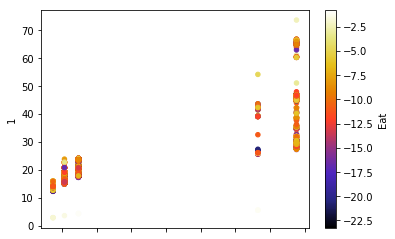

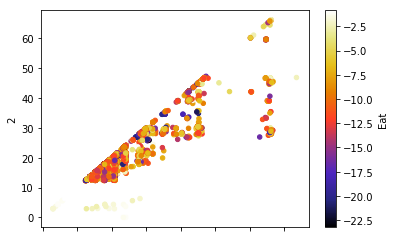

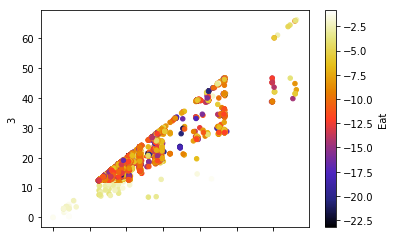

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
for x in range(3):
    
    df.plot.scatter(x,x+1,c=-1, colormap=plt.get_cmap('CMRmap'))
    plt.show()
df.plot.scatter?

### Splitting our data
Like we learned in our previous chapter, it's a good idea to split our data. 

In [7]:
from sklearn.model_selection import train_test_split
print(len(X))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
print(len(X_train))
print(len(X_test))

datasetX = X_train.values
datasetY = Y_train.values
#print(datasetX.shape)
#print(datasetY.shape)
#print(datasetY)

16242
12993
3249


## Video 2: first approach - easy layer building

Let's start with manually constructing our network again, just like we did in section 1. 

## Simplifying layer building
In chapter 1 we made our network using the following code: 



In [8]:
import tensorflow as tf

n_input = 1275
n_output = 1
inputplaceholder = tf.placeholder(dtype=tf.float32, shape=[None, n_input], name="inputplaceholder")

## This code can be simplified:
weights = tf.Variable(tf.random_normal([n_input, n_output]))
biases = tf.Variable(tf.zeros([n_output]))
layer_1 = tf.matmul(inputplaceholder, weights)
layer_2 = tf.add(layer_1, biases)
outputlayer = tf.nn.sigmoid(layer_2)

## Which we can simplify to, but this still is 3 lines...: 
weights = tf.Variable(tf.random_normal([n_input, n_output]))
biases = tf.Variable(tf.zeros([n_output]))
outputlayer = tf.nn.sigmoid(tf.add(tf.matmul(inputplaceholder, weights), biases))


Still, typing this out for a big neural network is a lot of work, and it's easy to make errors. This is why you can build functions that perform the same thing for you. 

You can also use the higher level functions already available in Tensorflow. You can make the same thing using: 

`tf.layers.dense(inputs=inputplaceholder, units=3, activation=tf.nn.sigmoid, name="single_layer_neural_network") `

Another option you might want to consider is the Keras python package. Keras is a high-level API definition for neural networks. It uses Tensorflow as backend to build its functions on. A neural network even more complex than in chapter two can be made like this: 
![keras logo](https://upload.wikimedia.org/wikipedia/commons/c/c9/Keras_Logo.jpg)
![tensorflow logo](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Tensorflow_logo.svg/1000px-Tensorflow_logo.svg.png)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(units=3, input_dim=4))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])


Using TensorFlow backend.


### Why stick to Tensorflow
It's very likely that for your specific application Keras is good enough (95% sure). However, Tensorflow as been adapting the Keras API specifications, and thus Tensorflow can do roughly the same as Keras. The reason to stick to Tensorflow is that it offers a LOT of extra functionality, which will come in handy for the "strange" applications you want to build. 

Let's create a simple single-layer neural network for our new dataset!

In [10]:
import tensorflow as tf
import numpy as np

In [11]:
LEARNING_RATE = 0.05
tf.reset_default_graph()
input_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1275], name="inputplaceholder")
output_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="userdefinedoutput")

## Add layers
dense = tf.layers.dense(inputs=input_pl,
                       units=512,
                       activation=tf.nn.sigmoid,
                       name="first_dense_layer")
network_prediction = tf.layers.dense(inputs=dense, 
                                    units=1,
                                    activation=None,
                                    name="prediction_dense_layer")


print(dense)
print(network_prediction)
loss = tf.losses.mean_squared_error(output_pl,network_prediction)
optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

print(loss)
print("Optimizer: --------")
print(optimizer)


Tensor("first_dense_layer/Sigmoid:0", shape=(?, 512), dtype=float32)
Tensor("prediction_dense_layer/BiasAdd:0", shape=(?, 1), dtype=float32)
Tensor("mean_squared_error/value:0", shape=(), dtype=float32)
Optimizer: --------
name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_first_dense_layer/kernel/ApplyGradientDescent"
input: "^GradientDescent/update_first_dense_layer/bias/ApplyGradientDescent"
input: "^GradientDescent/update_prediction_dense_layer/kernel/ApplyGradientDescent"
input: "^GradientDescent/update_prediction_dense_layer/bias/ApplyGradientDescent"



In [12]:
init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
sess.run(init)

This gives us this network: 
![network](http://www.pinchofintelligence.com/wp-content/uploads/2017/09/two-layer-regression.png)

In [13]:
import random

zipped = list(zip(datasetX, datasetY))

BATCH_SIZE = 32
for _ in range(100):
    datax = list()
    datay = list()
    for _ in range(BATCH_SIZE):
        samp = random.choice(zipped)
        datax.append(samp[0])
        datay.append([samp[1]])
    
    ## Run the training
    _, l = sess.run([optimizer, loss], 
                   feed_dict={input_pl: datax,
                             output_pl: datay})
    print(l)

139.795
34677.9
8.75111e+06
1.55705e+09
2.38293e+11
3.33949e+13
4.64994e+15
6.47457e+17
7.40409e+19
1.13846e+22
1.75049e+24
2.69155e+26
3.54388e+28
5.44908e+30
8.37849e+32
1.28828e+35
inf
inf
inf
inf
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


### Adjusting the learning rate
As you can see above our loss becomes HIGHER instead of lower. About once a week I see somebody on Stackoverflow ask why this is happening, and why their network is giving nan as output. The answer is: they have to adjust their learning rate.

![LR](http://www.pinchofintelligence.com/wp-content/uploads/2017/09/Learning-rates.png)

A nice analogy I like to use is one in which we are walking through misty mountains, and want to reach the deepest valley. Every 5 minutes we determine based on our small observation what path leads down, and continue that way. If we did this every second we could never leave small valleys. If we only did this every day we might walk right out of the valley again...

Let's adjust our learning rate tenfold every time till our network is able to learn something. 

In [14]:
LEARNING_RATE = 0.00005
optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
sess.run(init)

In [15]:


zipped = list(zip(datasetX, datasetY))

BATCH_SIZE = 32
loss_history = list()
for _ in range(1000):
    datax = list()
    datay = list()
    for _ in range(BATCH_SIZE):
        samp = random.choice(zipped)
        datax.append(samp[0])
        datay.append([samp[1]])
    _, l = sess.run([optimizer,loss], feed_dict={input_pl: datax, output_pl: datay})
    print(l)
    loss_history.append(l)

145.313
127.515
128.862
113.509
116.662
82.2697
94.6993
83.7917
81.5455
68.8278
60.3556
48.7687
56.1527
51.3272
39.1335
46.279
35.109
41.8653
35.3273
35.3734
40.2736
22.0901
32.7122
28.5273
34.3215
19.3949
20.1369
15.2504
18.0239
24.1888
19.7594
21.2241
21.6005
31.6276
15.7897
15.3272
16.833
19.1479
12.2878
20.3819
14.823
15.7834
25.8109
11.6614
15.1274
17.4049
11.3681
12.0579
11.9447
11.245
14.5038
12.0949
10.2701
13.5143
9.16859
10.8982
10.8105
10.6901
7.63371
5.82672
10.7101
12.1236
15.3615
8.8865
13.2406
9.08335
11.966
14.183
18.3076
5.70327
8.10391
6.96889
9.63313
11.1029
11.7924
9.98865
8.44
13.1007
7.13177
11.938
7.74801
9.73943
11.0476
13.4252
4.49264
13.058
11.9071
4.92649
9.84698
11.0116
8.86171
11.5861
11.9977
10.9599
10.3791
13.6879
10.7102
6.77511
12.7279
6.58055
12.6439
11.9561
11.415
8.83358
6.02709
13.6243
10.6466
7.52108
11.4385
7.5442
7.03815
5.77369
14.5529
6.92694
4.80331
7.57723
12.9736
12.5891
5.37695
7.66584
8.339
6.97361
4.10329
4.05361
6.47285
12.6638
8.64768
6

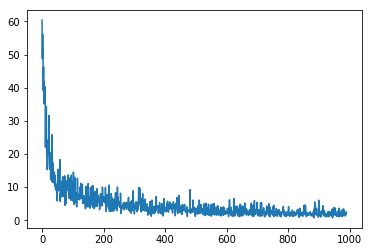

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_history[10:])

### Looking at gradients
Knowing about gradients and inspecting them is a vital part of working with neural networks. If your network is stuck, broke, or does not perform as you expect it: take a look at the gradients!

Part of why this is important is that in very deep neural networks we are dealing with vanishing and exploding gradients. Imagine that you start with a high gradient in your final layer, and multiply this with the learning rate. You update your weights and move on to the next layer. Your loss is lower in this layer, and thus your gradient is lower. 


## Video 3: preprocessing data
Last section we made our first multi-layer neural network. This video we are going to learn about standardising data, and why this is important. 

### Train and evaluation functions
To really see the impact of decisions we make when building any machine learning algorithm we need to build some functions that train a network and evaluate a network. I made two simple functions here with the code we made in previous videos so we can demonstrate the effect of preprocessing data!

In [17]:
def reset_and_train_network(sess,
                            inX, 
                            inY, 
                            batch_size, 
                            iterations, 
                            optimizer, 
                            inputplaceholder, 
                            outputplaceholder, 
                            loss_tensor, 
                            verbose=True):
    init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
    sess.run(init)

    zipped = list(zip(inX, inY))


    loss_history = list()
    for _ in range(iterations):
        datax = list()
        datay = list()
        for _ in range(batch_size):
            samp = random.choice(zipped)
            datax.append(samp[0])
            datay.append([samp[1]])
        _, l = sess.run([optimizer,loss_tensor], 
                        feed_dict={inputplaceholder: datax, 
                                   outputplaceholder: datay})
        if verbose:
            print(l)
        loss_history.append(l)
    return loss_history

## Do the train set
def evaluate_network(sess,
                     inX, 
                     inY, 
                     prediction_tensor, 
                     inputplaceholder,
                     outputplaceholder,
                     loss):


    datasetY2 = [[x] for x in inY]
    predicted_values, loss_dataset = sess.run([prediction_tensor,loss], 
                                              feed_dict={inputplaceholder: inX, 
                                                         outputplaceholder: datasetY2})
    print("Loss dataset: " + str(loss_dataset))
    plt.scatter(datasetY2, predicted_values)
    plt.xlabel("True value")
    plt.ylabel("Predicted value")
    plt.show()
    



### Why preprocess data
At the moment we are feedign the raw properties of atoms to the network. When we worked with the iris dataset we saw that by shifting all data a bit manually even a single layer neural network was able to classify the data. 

To preprocss the data you can use the [Scikit preprocessing library](http://scikit-learn.org/stable/modules/preprocessing.html). With this library you standardise all your data outside of your Tensorflow pipeline. If you want to keep everything inside this pipeline you can use the [tf.Transform library]( https://github.com/tensorflow/transform)



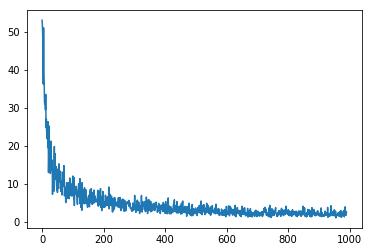

Evaluating testset on network without preprocessing
Loss dataset: 1.97831


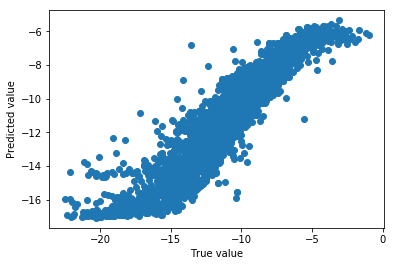

In [18]:
import random
%matplotlib inline
import matplotlib.pyplot as plt

COMPARE_MSE_ITERATIONS = 1000
## Without standardizing our data:
losses = reset_and_train_network(sess,X_train.values,
                                 Y_train.values, 
                                 64, 
                                COMPARE_MSE_ITERATIONS,
                                optimizer, 
                                input_pl, 
                                output_pl,
                                loss,
                                verbose=False)
plt.plot(losses[10:])
plt.show()
print("Evaluating testset on network without preprocessing")

## Evaluate our network
evaluate_network(sess, X_test, Y_test, network_prediction, input_pl,
                output_pl, loss)


### Determining the mean squared error on a testset
Although our loss function already indicates what the mean squared error on our train set is, this does not help us to compare models after we standardised our input and output data, as the loss naturally will be smaller with smaller numbers. After we "inverted" our predictions back to their normal range we can compare the mean square errors using the sklearn.metrics library! Let's do this now so we can verify the mean squared error function works. 

In [19]:

true_values = [[x] for x in Y_test]
predicted_values = sess.run(network_prediction, feed_dict={input_pl: X_test})

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predicted_values, true_values)
print("Test mean squared error: " + str(mse))


Test mean squared error: 1.97831274778


### Scaling our data
To actually scale our data we use the **StandardScaler** of the sklearn library. Calling the `fit(data)` function returns an object that can scale your data. To see how well our neural network performs we scale on the traindata, and evaluate our network on the testdata. 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()


[  1.63512875e-16   1.47653766e-16  -6.30262836e-16 ...,  -1.53122424e-17
  -7.38268832e-18  -1.23044805e-17]
[ 1.  1.  1. ...,  1.  1.  1.]


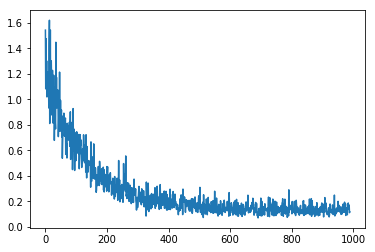

Evaluating trainset with preprocessing
Loss dataset: 0.132098


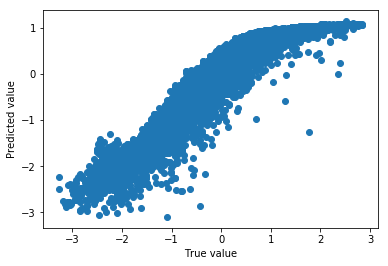

Evaluating testset with preprocessing
Loss dataset: 0.132127


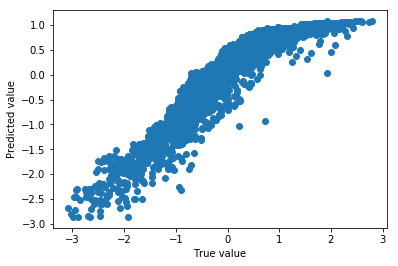

In [23]:
from sklearn import preprocessing

## Create the scalers
scaler = preprocessing.StandardScaler().fit(X_train)
outputscaler = preprocessing.StandardScaler().fit(Y_train.reshape(-1, 1))

## Scale all datasets
scaled_trainset = scaler.transform(X_train)
scaled_testset = scaler.transform(X_test)
scaled_train_out = outputscaler.transform(Y_train.reshape(-1, 1))
scaled_test_out = outputscaler.transform(Y_test.reshape(-1, 1))
scaled_train_out = scaled_train_out.reshape(-1)
scaled_test_out = scaled_test_out.reshape(-1)
#print(Y_train.reshape(-1, 1).shape)
#print(scaled_train_out.shape)

## Verify our data is scaled correctly 
print(scaled_trainset.mean(axis=0))
print(scaled_trainset.std(axis=0))


## Retrain the same network with standardized data
losses_norm = reset_and_train_network(sess,scaled_trainset,
                                      scaled_train_out,
                                      64, 
                                        COMPARE_MSE_ITERATIONS,
                                        optimizer, 
                                        input_pl, 
                                        output_pl,
                                        loss,
                                        verbose=False)
plt.plot(losses_norm[10:])
plt.show()

## Evaluate the trainset after preprocessing and the testset after preprocessing
print("Evaluating trainset with preprocessing")
evaluate_network(sess,scaled_trainset, scaled_train_out, network_prediction, input_pl, output_pl, loss)
print("Evaluating testset with preprocessing")
evaluate_network(sess,scaled_testset, scaled_test_out, network_prediction, input_pl, output_pl, loss)


In [24]:
from sklearn.metrics import mean_squared_error

## Predict the ground energy of each molecule
datasetY2 = [[x] for x in Y_test]
predicted_values = sess.run(network_prediction, feed_dict={input_pl: scaled_testset})

## Scale these values back, and calculate the MSE
inversed_predicted_values = outputscaler.inverse_transform(predicted_values)
mse = mean_squared_error(inversed_predicted_values, datasetY2)
print("MSE testset with scaling: " + str(mse))

MSE testset with scaling: 1.78037025323


### Visualising your graph
When working with Tensorflow it's easy to make a mistake. For example, when adding an extra layer to your network it's easy to forget to connect it to other layers. A cool feature of our Jupyter notebook is that you can visualise the graph you made. The source of this code can be found in [this Stackoverflow answer](https://stackoverflow.com/questions/38189119/simple-way-to-visualize-a-tensorflow-graph-in-jupyter/38192374#38192374). 


In [25]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))


In [26]:
show_graph(tf.get_default_graph().as_graph_def())


## Video 4: improving the network by understanding the activation function



### Deep neural network
So far we only made a two-layer neural network. You probably heard about "deep neural networks", which means people found out that often by adding more layers in a smart way you can get even better error scores. Let's try to create a four-layer neural network, and see if this improves our error. We start by copying our network and adding layers to it. 

Note one big change: I define a variable for the activation function which we will tweak later!

In [27]:
LEARNING_RATE = 0.0005
ACTIVATION_FUNCTION = tf.nn.sigmoid

tf.reset_default_graph()
input_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1275], name="inputplaceholder")
output_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="userdefinedoutput")

dense = tf.layers.dense(inputs=input_pl, 
                        units=512, 
                        activation=ACTIVATION_FUNCTION, 
                        name="first_dense_layer")
dense2 = tf.layers.dense(inputs=dense, 
                        units=256, 
                        activation=ACTIVATION_FUNCTION, 
                        name="second_dense_layer")
dense3 = tf.layers.dense(inputs=dense2, 
                        units=128, 
                        activation=ACTIVATION_FUNCTION, 
                        name="third_dense_layer")

network_prediction = tf.layers.dense(inputs=dense3       , 
                                     units=1, 
                                     activation=None, 
                                     name="prediction_dense_layer")

loss = tf.losses.mean_squared_error(output_pl,network_prediction)
optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

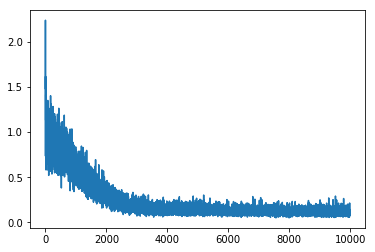

MSE: 1.45339082081


In [28]:

sess = tf.Session()

losses = reset_and_train_network(sess,scaled_trainset,
                                      scaled_train_out,
                                      64, 
                                        10000,
                                        optimizer, 
                                        input_pl, 
                                        output_pl,
                                        loss,
                                        verbose=False)


plt.plot(losses[10:])
plt.show()

## Evaluate on the testset: Predict the ground energy of each molecule, 
## Scale these values back, and calculate the MSE
datasetY2 = [[x] for x in Y_test]
predicted_values = sess.run(network_prediction, feed_dict={input_pl: scaled_testset})

inversed_predicted_values = outputscaler.inverse_transform(predicted_values)
mse = mean_squared_error(inversed_predicted_values, datasetY2)

print("MSE: " + str(mse))

### Result: lower MSE
As you can see we now have a way lower mean squared error. Now our goal is to minimize this even further. If you look at the dots we plotted with the predicted and actual value there is a strange pattern, which I think we can remove by selecting a different activation function. Let's try it: 


In [29]:
LEARNING_RATE = 0.0005
ACTIVATION_FUNCTION = tf.nn.relu

tf.reset_default_graph()
input_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1275], name="inputplaceholder")
output_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="userdefinedoutput")

dense = tf.layers.dense(inputs=input_pl, units=512, activation=ACTIVATION_FUNCTION, name="first_dense_layer")
dense2 = tf.layers.dense(inputs=dense, units=256, activation=ACTIVATION_FUNCTION, name="second_dense_layer")
dense3 = tf.layers.dense(inputs=dense2, units=64, activation=ACTIVATION_FUNCTION, name="third_dense_layer")
network_prediction = tf.layers.dense(inputs=dense3, units=1, activation=None, name="prediction_dense_layer")

loss = tf.losses.mean_squared_error(output_pl,network_prediction)
optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

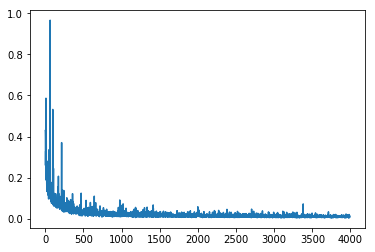

MSE: 0.151143734324


In [30]:
sess = tf.Session()

losses = reset_and_train_network(sess,scaled_trainset,
                                      scaled_train_out,
                                      64, 
                                        4000,
                                        optimizer, 
                                        input_pl, 
                                        output_pl,
                                        loss,
                                        verbose=False)

plt.plot(losses[10:])
plt.show()

## Evaluate on the testset: Predict the ground energy of each molecule, 
## Scale these values back, and calculate the MSE
datasetY2 = [[x] for x in Y_test]
predicted_values = sess.run(network_prediction, feed_dict={input_pl: scaled_testset})

inversed_predicted_values = outputscaler.inverse_transform(predicted_values)
mse = mean_squared_error(inversed_predicted_values, datasetY2)

print("MSE: " + str(mse))

### Visualising the activation layer
Well, looks like we were really able to make a big improvement this time. Lets visualise what's actually happening in the activation layer:

In [31]:
def visualize_function(function, name):
    ## Create inputs between -5 and 5, and put this in a Tensorflow variable
    inputdata = np.arange(-5.0, 5.0, 0.1)
    mydatainput = tf.Variable(inputdata)
    
    ## Create the output tensor using the supplied function
    functionoutput = function(mydatainput)
    
    ## Create a temporary session for this graph, and evaluate the activation for these datapoints
    with tf.Session() as temp_session:
        init = tf.global_variables_initializer() 
        temp_session.run(init)
        activationdata = functionoutput.eval(session=temp_session)
        
        ## Plot the results
        plt.plot(inputdata,activationdata)
        plt.xlabel("input")
        plt.ylabel("activation")
        plt.title(name)
        plt.show()

        
   

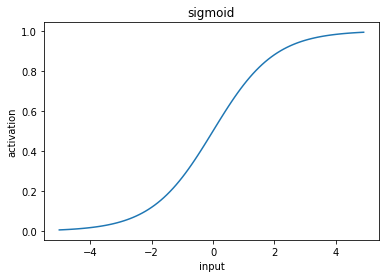

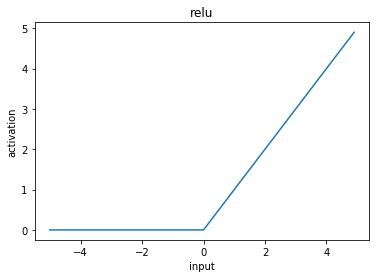

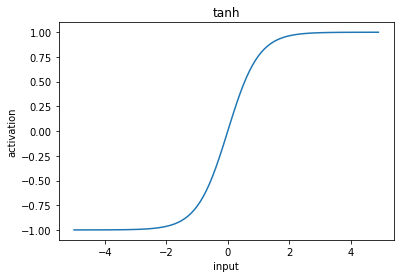

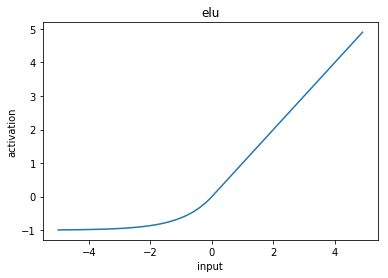

In [32]:
activation_functions = [(tf.nn.sigmoid, "sigmoid"), 
                        (tf.nn.relu, "relu"),
                       (tf.nn.tanh, "tanh"),
                       (tf.nn.elu, "elu")]

for func, name in activation_functions:
    visualize_function(func, name)
        


## Video 5: the importance of hyper parameters
So far when defining our neural network we kind of guessed the "hyper parameters". Hyper parameters describe our network, but they are not part of the actual network. Note that they are able to have a big influence on your network: selecting the right learning rate, the right amount of layers, and the sizes of your layers are very important, and can contribute a lot to your final performance. 

In this section we will try to find the best performance for the network we made in the last video. In this case we optimize one hyper parameter: the learning rate. 

In [33]:

## Define the network: the same as the network in the previous section. 
ACTIVATION_FUNCTION =tf.nn.relu
tf.reset_default_graph()
input_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1275], name="inputplaceholder")
output_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="userdefinedoutput")
dense = tf.layers.dense(inputs=input_pl, units=512, activation=ACTIVATION_FUNCTION, name="first_dense_layer")
dense2 = tf.layers.dense(inputs=dense, units=256, activation=ACTIVATION_FUNCTION, name="second_dense_layer")
dense3 = tf.layers.dense(inputs=dense2, units=64, activation=ACTIVATION_FUNCTION, name="third_dense_layer")
network_prediction = tf.layers.dense(inputs=dense3, units=1, activation=None, name="prediction_dense_layer")
loss = tf.losses.mean_squared_error(output_pl,network_prediction)

## Record MSE and loss value for 
mses = list()
hyperparameter_losses = list()

## Select these learning rates: currently we were using 0.0005
learning_rates = [0.0001, 0.0003, 0.0005, 0.0007, 0.0009, 0.0011]
for learning_rate in learning_rates:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    sess = tf.Session()
    losses = reset_and_train_network(sess,scaled_trainset,
                                      scaled_train_out,
                                      64, 
                                        1000,
                                        optimizer, 
                                        input_pl, 
                                        output_pl,
                                        loss,
                                        verbose=False)
    datasetY2 = [[x] for x in Y_test]
    predicted_values = sess.run(network_prediction, feed_dict={input_pl: scaled_testset})

    ## Scale these values back, and calculate the MSE
    inversed_predicted_values = outputscaler.inverse_transform(predicted_values)
    hyperparameter_losses.append(losses[-1])

    mse = mean_squared_error(inversed_predicted_values, datasetY2)
    mses.append(mse)

    print("Loss at learning rate: " + str(learning_rate) + " loss: " + str(losses[-1]) + " mse: " + str(mse))


Loss at learning rate: 0.0001 loss: 0.0494122 mse: 0.764069108961
Loss at learning rate: 0.0003 loss: 0.0215972 mse: 0.455328071126
Loss at learning rate: 0.0005 loss: 0.0409199 mse: 0.329058510741
Loss at learning rate: 0.0007 loss: 0.0232271 mse: 0.282334399267
Loss at learning rate: 0.0009 loss: 0.0159243 mse: 0.239097065492
Loss at learning rate: 0.0011 loss: 0.0186858 mse: 0.183611407107


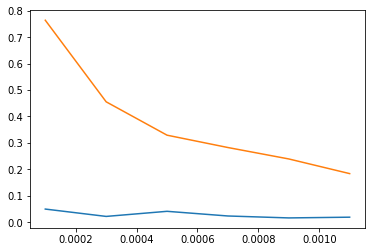

In [34]:
plt.plot(learning_rates,hyperparameter_losses)
plt.plot(learning_rates,mses)



### More on hyper parameters
At the moment we went over the learning rate parameter. You can go crazy on hyper parameter optimisation: try to adjust the sizes of layers in your neural network, try to learning rate, try the amount of iterations, try different batch sizes, etc. etc. 

Unless you have a large datacenter with computers you can't try them all, so write down a few sensible values for each hyper parameter, test these, and determine what values to test next. Note that you don't have to keep watching while your network is training. It's exciting to enter some, go to bed, and wake up with more knowledge on what to do to improve your neural network!

## Bonus: visualise what our network learned

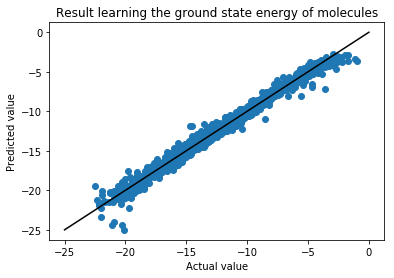

In [35]:
plt.scatter(datasetY2, inversed_predicted_values)
plt.title("Result learning the ground state energy of molecules")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.plot([-25,0],[-25,0],color="black")